In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
data = pd.read_csv("C:/Users/Windows10/Downloads/dailyActivity_merged.csv")
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [3]:
data.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [4]:
data.shape

(940, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [6]:
data.duplicated(subset=['ActivityDate'])

0      False
1      False
2      False
3      False
4      False
       ...  
935     True
936     True
937     True
938     True
939     True
Length: 940, dtype: bool

In [7]:
data['SedentaryActiveDistance'].value_counts()

0.00    858
0.01     50
0.02     21
0.03      4
0.05      3
0.07      1
0.04      1
0.11      1
0.10      1
Name: SedentaryActiveDistance, dtype: int64

In [8]:
df = data[['ActivityDate','TotalSteps','TotalDistance','VeryActiveDistance','LightActiveDistance','VeryActiveMinutes','LightlyActiveMinutes','SedentaryMinutes','Calories']]
df

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.500000,1.88,6.06,25,328,728,1985
1,4/13/2016,10735,6.970000,1.57,4.71,21,217,776,1797
2,4/14/2016,10460,6.740000,2.44,3.91,30,181,1218,1776
3,4/15/2016,9762,6.280000,2.14,2.83,29,209,726,1745
4,4/16/2016,12669,8.160000,2.71,5.04,36,221,773,1863
...,...,...,...,...,...,...,...,...,...
935,5/8/2016,10686,8.110000,1.08,6.80,17,245,1174,2847
936,5/9/2016,20226,18.250000,11.10,6.24,73,217,1131,3710
937,5/10/2016,10733,8.150000,1.35,6.28,18,224,1187,2832
938,5/11/2016,21420,19.559999,13.22,5.89,88,213,1127,3832


In [9]:
df.describe()

,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,7637.910638,5.489702,1.502681,3.340819,21.164894,192.812766,991.210638,2303.609574
std,5087.150742,3.924606,2.658941,2.040655,32.844803,109.174700,301.267437,718.166862
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3789.750000,2.620000,0.000000,1.945000,0.000000,127.000000,729.750000,1828.500000
50%,7405.500000,5.245000,0.210000,3.365000,4.000000,199.000000,1057.500000,2134.000000
75%,10727.000000,7.712500,2.052500,4.782500,32.000000,264.000000,1229.500000,2793.250000
max,36019.000000,28.030001,21.920000,10.710000,210.000000,518.000000,1440.000000,4900.000000


In [10]:
df['ActivityDate'].unique()

array(['4/12/2016', '4/13/2016', '4/14/2016', '4/15/2016', '4/16/2016',
       '4/17/2016', '4/18/2016', '4/19/2016', '4/20/2016', '4/21/2016',
       '4/22/2016', '4/23/2016', '4/24/2016', '4/25/2016', '4/26/2016',
       '4/27/2016', '4/28/2016', '4/29/2016', '4/30/2016', '5/1/2016',
       '5/2/2016', '5/3/2016', '5/4/2016', '5/5/2016', '5/6/2016',
       '5/7/2016', '5/8/2016', '5/9/2016', '5/10/2016', '5/11/2016',
       '5/12/2016'], dtype=object)

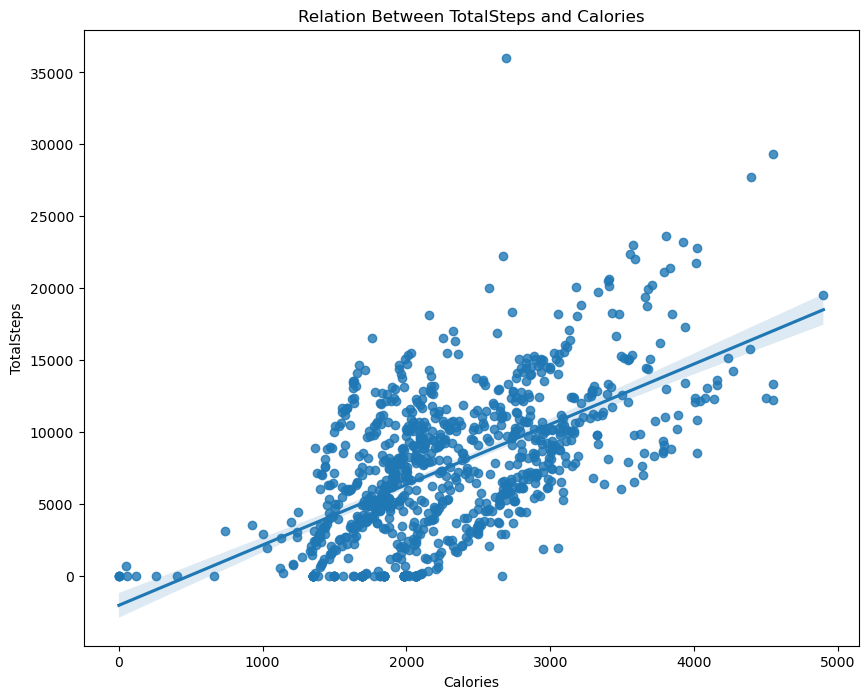

In [11]:
plt.figure(figsize=(10,8))
sns.regplot(df,y ='TotalSteps',x='Calories',x_ci='ci',truncate=True, ax=None,marker='o')
plt.title('Relation Between TotalSteps and Calories')
plt.show()

### From the plot we can see a linear relation between total steps and calories, which means as total step increases calories burned also increases.

In [12]:
April = df[df['ActivityDate']<'5/1/2016']
April

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.500000,1.88,6.06,25,328,728,1985
1,4/13/2016,10735,6.970000,1.57,4.71,21,217,776,1797
2,4/14/2016,10460,6.740000,2.44,3.91,30,181,1218,1776
3,4/15/2016,9762,6.280000,2.14,2.83,29,209,726,1745
4,4/16/2016,12669,8.160000,2.71,5.04,36,221,773,1863
...,...,...,...,...,...,...,...,...,...
923,4/26/2016,11101,8.430000,1.76,6.50,22,258,1157,2860
924,4/27/2016,23629,20.650000,13.07,7.10,93,235,1104,3808
925,4/28/2016,14890,11.300000,4.93,5.97,58,231,1143,3060
926,4/29/2016,9733,7.390000,1.38,5.79,18,210,1207,2698


In [13]:
April.sort_values('SedentaryMinutes',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
361,4/27/2016,0,0.00,0.0,0.00,0,0,1440,1980
671,4/29/2016,0,0.00,0.0,0.00,0,0,1440,1841
379,4/14/2016,0,0.00,0.0,0.00,0,0,1440,1776
381,4/12/2016,7753,5.20,0.0,0.00,0,0,1440,2115
742,4/17/2016,0,0.00,0.0,0.00,0,0,1440,1629
...,...,...,...,...,...,...,...,...,...
604,4/19/2016,11135,8.41,0.0,8.41,0,480,425,2606
612,4/27/2016,9411,7.11,0.0,7.11,0,458,417,2576
607,4/22/2016,8206,6.20,0.0,6.20,0,402,413,2409
110,4/30/2016,4014,2.67,0.0,2.65,0,184,218,1763


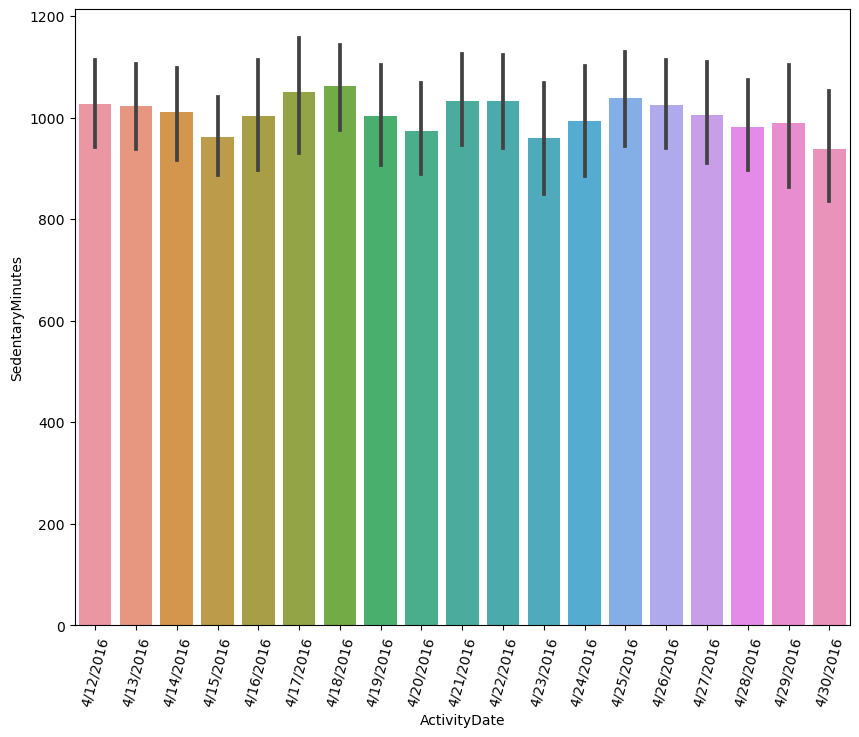

In [14]:
plt.figure(figsize=(10,8))
sns.barplot(April,x='ActivityDate',y='SedentaryMinutes')
plt.xticks(rotation = 75)
plt.show()

In [15]:
Aprildf = April[April['TotalSteps']!= 0]
Aprildf

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.500000,1.88,6.06,25,328,728,1985
1,4/13/2016,10735,6.970000,1.57,4.71,21,217,776,1797
2,4/14/2016,10460,6.740000,2.44,3.91,30,181,1218,1776
3,4/15/2016,9762,6.280000,2.14,2.83,29,209,726,1745
4,4/16/2016,12669,8.160000,2.71,5.04,36,221,773,1863
...,...,...,...,...,...,...,...,...,...
923,4/26/2016,11101,8.430000,1.76,6.50,22,258,1157,2860
924,4/27/2016,23629,20.650000,13.07,7.10,93,235,1104,3808
925,4/28/2016,14890,11.300000,4.93,5.97,58,231,1143,3060
926,4/29/2016,9733,7.390000,1.38,5.79,18,210,1207,2698


In [16]:
April.sort_values('SedentaryMinutes',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
361,4/27/2016,0,0.00,0.0,0.00,0,0,1440,1980
671,4/29/2016,0,0.00,0.0,0.00,0,0,1440,1841
379,4/14/2016,0,0.00,0.0,0.00,0,0,1440,1776
381,4/12/2016,7753,5.20,0.0,0.00,0,0,1440,2115
742,4/17/2016,0,0.00,0.0,0.00,0,0,1440,1629
...,...,...,...,...,...,...,...,...,...
604,4/19/2016,11135,8.41,0.0,8.41,0,480,425,2606
612,4/27/2016,9411,7.11,0.0,7.11,0,458,417,2576
607,4/22/2016,8206,6.20,0.0,6.20,0,402,413,2409
110,4/30/2016,4014,2.67,0.0,2.65,0,184,218,1763


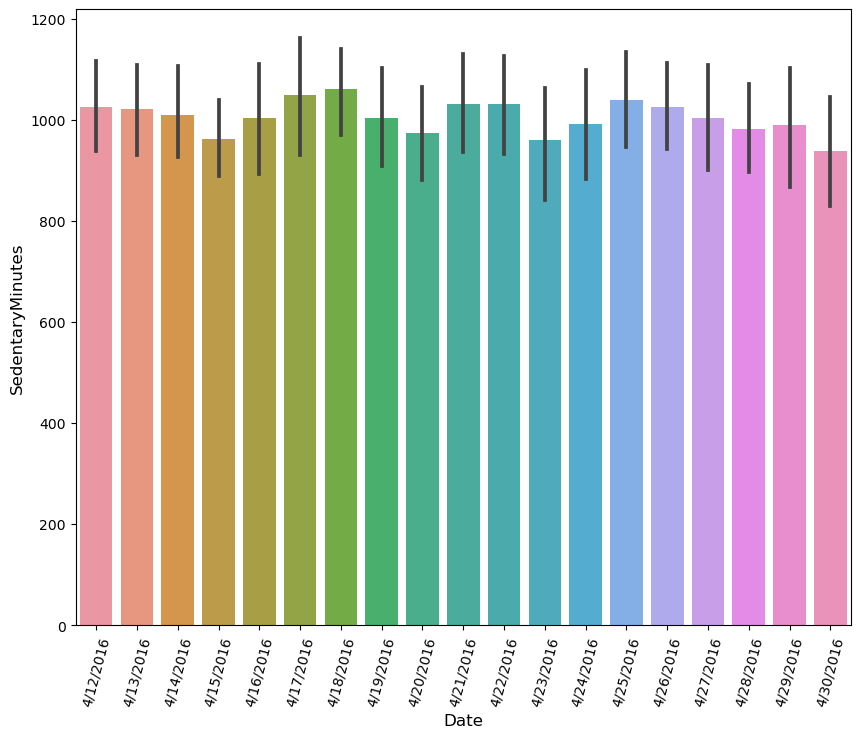

In [17]:
plt.figure(figsize=(10,8))
sns.barplot(April,x='ActivityDate',y='SedentaryMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("SedentaryMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [18]:
April[April['ActivityDate']=='4/18/2016'].sum()

ActivityDate            4/18/20164/18/20164/18/20164/18/20164/18/20164...
TotalSteps                                                         252703
TotalDistance                                                  181.049999
VeryActiveDistance                                              53.300001
LightActiveDistance                                                 105.0
VeryActiveMinutes                                                     781
LightlyActiveMinutes                                                 6025
SedentaryMinutes                                                    33959
Calories                                                            74668
dtype: object

In [19]:
April[April['ActivityDate']=='4/17/2016'].sum()

ActivityDate            4/17/20164/17/20164/17/20164/17/20164/17/20164...
TotalSteps                                                         205096
TotalDistance                                                  145.299999
VeryActiveDistance                                              36.649999
LightActiveDistance                                                 90.31
VeryActiveMinutes                                                     605
LightlyActiveMinutes                                                 5291
SedentaryMinutes                                                    33599
Calories                                                            71391
dtype: object

In [20]:
April[April['ActivityDate']=='4/22/2016'].sum()

ActivityDate            4/22/20164/22/20164/22/20164/22/20164/22/20164...
TotalSteps                                                         238284
TotalDistance                                                  170.489999
VeryActiveDistance                                              51.549999
LightActiveDistance                                            102.009999
VeryActiveMinutes                                                     782
LightlyActiveMinutes                                                 6257
SedentaryMinutes                                                    33028
Calories                                                            74485
dtype: object

## Take Away

1. In month April of year 2016 the most inactive day is 18th.
2. Total sedentaryminutes is  32519.

In [21]:
Aprildf.head(50)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,4/12/2016,13162,8.50,1.88,6.06,25,328,728,1985
1,4/13/2016,10735,6.97,1.57,4.71,21,217,776,1797
2,4/14/2016,10460,6.74,2.44,3.91,30,181,1218,1776
3,4/15/2016,9762,6.28,2.14,2.83,29,209,726,1745
4,4/16/2016,12669,8.16,2.71,5.04,36,221,773,1863
5,4/17/2016,9705,6.48,3.19,2.51,38,164,539,1728
6,4/18/2016,13019,8.59,3.25,4.71,42,233,1149,1921
7,4/19/2016,15506,9.88,3.53,5.03,50,264,775,2035
8,4/20/2016,10544,6.68,1.96,4.24,28,205,818,1786
9,4/21/2016,9819,6.34,1.34,4.65,19,211,838,1775


In [22]:
Aprildf.sort_values('SedentaryMinutes',ascending=False).head(50)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
853,4/16/2016,5319,4.15,0.00,0.00,0,0,1440,2693
381,4/12/2016,7753,5.20,0.00,0.00,0,0,1440,2115
412,4/12/2016,10122,7.78,0.00,0.00,0,0,1440,2955
854,4/17/2016,3008,2.35,0.00,0.00,0,0,1440,2439
107,4/27/2016,4,0.00,0.00,0.00,0,1,1439,1348
100,4/20/2016,8,0.01,0.00,0.01,0,1,1439,1349
352,4/18/2016,62,0.04,0.00,0.04,0,2,1438,1995
351,4/17/2016,16,0.01,0.00,0.01,0,2,1438,1990
741,4/16/2016,31,0.01,0.00,0.01,0,3,1437,1635
348,4/14/2016,108,0.08,0.00,0.03,0,3,1437,2011


In [23]:
Aprildf.duplicated(subset=['ActivityDate'])

0      False
1      False
2      False
3      False
4      False
       ...  
923     True
924     True
925     True
926     True
927     True
Length: 566, dtype: bool

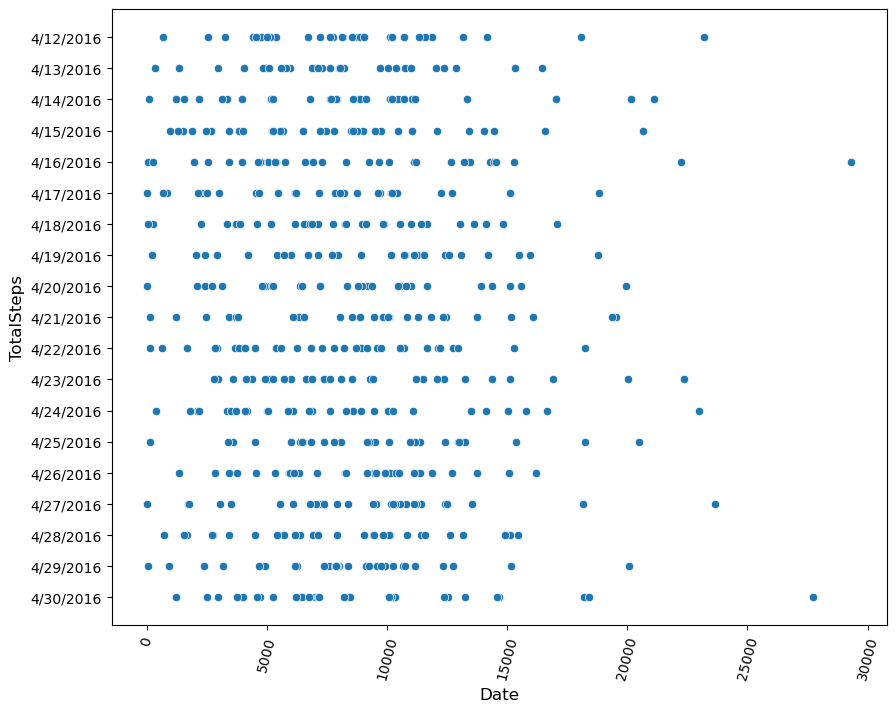

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(Aprildf,x='TotalSteps',y='ActivityDate')
plt.xlabel("Date",fontsize=12)
plt.ylabel("TotalSteps",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [25]:
Aprildf.sort_values('VeryActiveDistance',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
927,4/30/2016,27745,26.719999,21.66,4.93,124,223,1089,4398
771,4/15/2016,20669,16.240000,13.26,2.59,132,158,1142,3410
913,4/16/2016,29326,25.290001,13.24,10.71,94,429,888,4547
780,4/24/2016,22988,17.950001,13.13,3.26,129,182,1096,3577
924,4/27/2016,23629,20.650000,13.07,7.10,93,235,1104,3808
...,...,...,...,...,...,...,...,...,...
625,4/12/2016,4562,3.450000,0.00,3.45,0,199,1241,2560
626,4/13/2016,7142,5.400000,0.00,5.39,0,350,1090,2905
627,4/14/2016,7671,5.800000,0.00,5.77,0,363,1077,2952
628,4/15/2016,9501,7.180000,0.00,7.17,0,328,1112,2896


In [26]:
Aprildf.sort_values('VeryActiveMinutes',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
579,4/24/2016,15764,11.78,7.65,1.98,210,141,425,4392
585,4/30/2016,12363,9.24,5.83,2.61,207,163,621,4501
572,4/17/2016,12231,9.14,5.98,2.32,200,159,525,4552
571,4/16/2016,14269,10.66,6.64,2.73,184,158,472,4274
827,4/21/2016,15148,12.01,6.90,4.29,137,145,677,4236
...,...,...,...,...,...,...,...,...,...
633,4/20/2016,6361,4.81,0.00,4.80,0,258,1182,2701
635,4/22/2016,6238,4.72,0.00,4.72,0,302,1138,2796
637,4/24/2016,5896,4.46,0.00,4.46,0,258,1182,2703
640,4/27/2016,5565,4.21,0.00,4.18,0,287,1153,2743


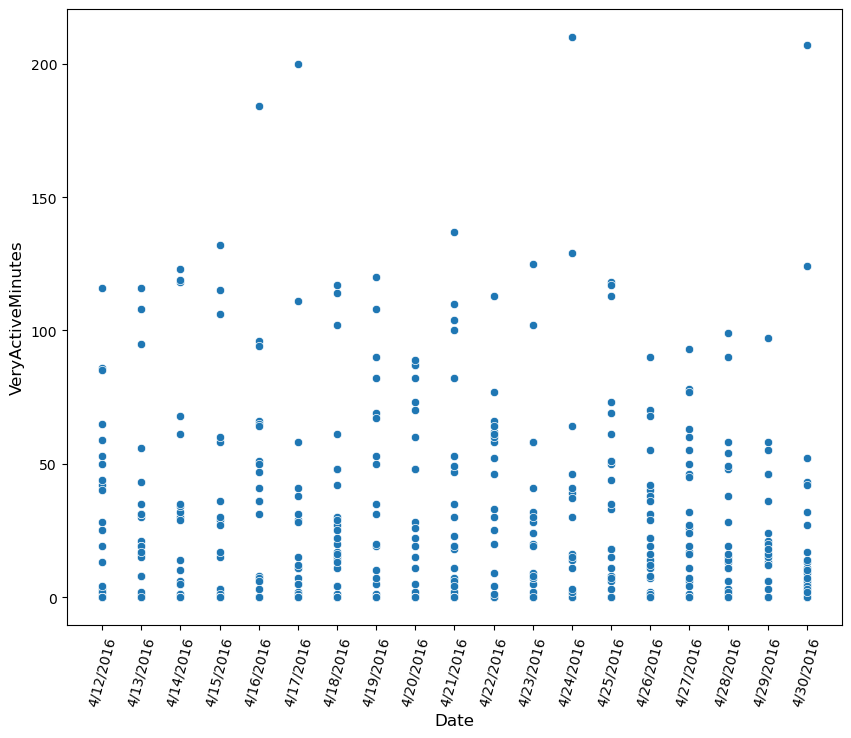

In [27]:
plt.figure(figsize=(10,8))
sns.scatterplot(Aprildf,x='ActivityDate',y='VeryActiveMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("VeryActiveMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [28]:
Aprildf[Aprildf['ActivityDate']=='4/24/2016'].sum()

ActivityDate            4/24/20164/24/20164/24/20164/24/20164/24/20164...
TotalSteps                                                         236621
TotalDistance                                                  174.960001
VeryActiveDistance                                              56.540001
LightActiveDistance                                             98.540001
VeryActiveMinutes                                                     673
LightlyActiveMinutes                                                 5962
SedentaryMinutes                                                    28869
Calories                                                            69999
dtype: object

In [29]:
Aprildf[Aprildf['ActivityDate']=='4/30/2016'].sum()

ActivityDate            4/30/20164/30/20164/30/20164/30/20164/30/20164...
TotalSteps                                                         258726
TotalDistance                                                  189.119998
VeryActiveDistance                                                  49.48
LightActiveDistance                                                116.95
VeryActiveMinutes                                                     628
LightlyActiveMinutes                                                 6775
SedentaryMinutes                                                    24786
Calories                                                            69548
dtype: object

## Take Away

1. In month April of year 2016 the most active day is 24th.
2. Total of veryactive time is  673.


In [30]:
May = df[df['ActivityDate']>='5/1/2016']
May

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
19,5/1/2016,10602,6.810000,2.29,2.92,33,246,730,1820
20,5/2/2016,14727,9.710000,3.21,5.92,41,277,798,2004
21,5/3/2016,15103,9.660000,3.73,4.88,50,254,816,1990
22,5/4/2016,11100,7.150000,2.46,3.82,36,203,1179,1819
23,5/5/2016,14070,8.900000,2.92,4.88,45,250,857,1959
...,...,...,...,...,...,...,...,...,...
935,5/8/2016,10686,8.110000,1.08,6.80,17,245,1174,2847
936,5/9/2016,20226,18.250000,11.10,6.24,73,217,1131,3710
937,5/10/2016,10733,8.150000,1.35,6.28,18,224,1187,2832
938,5/11/2016,21420,19.559999,13.22,5.89,88,213,1127,3832


In [31]:
Maydf=May[May['TotalSteps']!= 0]
Maydf

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
19,5/1/2016,10602,6.810000,2.29,2.92,33,246,730,1820
20,5/2/2016,14727,9.710000,3.21,5.92,41,277,798,2004
21,5/3/2016,15103,9.660000,3.73,4.88,50,254,816,1990
22,5/4/2016,11100,7.150000,2.46,3.82,36,203,1179,1819
23,5/5/2016,14070,8.900000,2.92,4.88,45,250,857,1959
...,...,...,...,...,...,...,...,...,...
935,5/8/2016,10686,8.110000,1.08,6.80,17,245,1174,2847
936,5/9/2016,20226,18.250000,11.10,6.24,73,217,1131,3710
937,5/10/2016,10733,8.150000,1.35,6.28,18,224,1187,2832
938,5/11/2016,21420,19.559999,13.22,5.89,88,213,1127,3832


In [32]:
May.sort_values('SedentaryMinutes',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
879,5/12/2016,0,0.00,0.00,0.00,0,0,1440,0
904,5/6/2016,0,0.00,0.00,0.00,0,0,1440,1688
118,5/8/2016,0,0.00,0.00,0.00,0,0,1440,1347
119,5/9/2016,0,0.00,0.00,0.00,0,0,1440,1347
120,5/10/2016,0,0.00,0.00,0.00,0,0,1440,1347
...,...,...,...,...,...,...,...,...,...
624,5/9/2016,4477,3.38,0.00,3.38,0,197,125,1248
736,5/7/2016,0,0.00,0.00,0.00,0,0,111,120
908,5/10/2016,0,0.00,0.00,0.00,0,0,48,57
345,5/11/2016,746,0.50,0.37,0.13,4,9,13,52


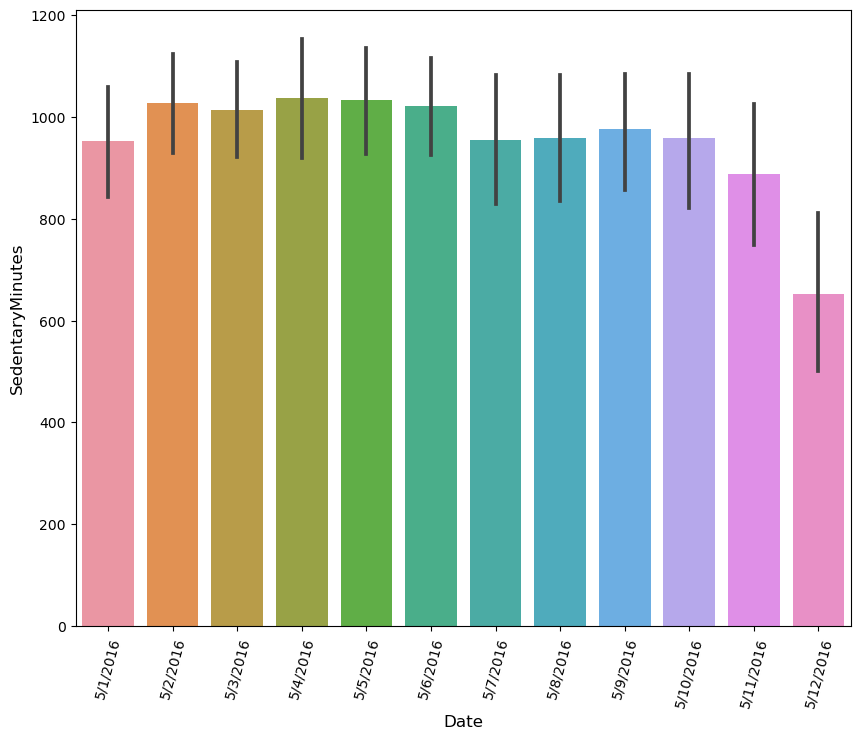

In [33]:
plt.figure(figsize=(10,8))
sns.barplot(May,x='ActivityDate',y='SedentaryMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("SedentaryMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [34]:
May[May['ActivityDate']=='5/2/2016'].sum()

ActivityDate            5/2/20165/2/20165/2/20165/2/20165/2/20165/2/20...
TotalSteps                                                         204434
TotalDistance                                                      144.05
VeryActiveDistance                                                   28.3
LightActiveDistance                                                  93.0
VeryActiveMinutes                                                     466
LightlyActiveMinutes                                                 5418
SedentaryMinutes                                                    29795
Calories                                                            65988
dtype: object

In [35]:
May[May['ActivityDate']=='5/3/2016'].sum()

ActivityDate            5/3/20165/3/20165/3/20165/3/20165/3/20165/3/20...
TotalSteps                                                         248203
TotalDistance                                                      176.74
VeryActiveDistance                                                  44.93
LightActiveDistance                                            104.670001
VeryActiveMinutes                                                     723
LightlyActiveMinutes                                                 5897
SedentaryMinutes                                                    29389
Calories                                                            71163
dtype: object

In [36]:
May[May['ActivityDate']=='5/4/2016'].sum()

ActivityDate            5/4/20165/4/20165/4/20165/4/20165/4/20165/4/20...
TotalSteps                                                         196149
TotalDistance                                                  143.269999
VeryActiveDistance                                                  39.28
LightActiveDistance                                                 87.94
VeryActiveMinutes                                                     405
LightlyActiveMinutes                                                 5214
SedentaryMinutes                                                    30078
Calories                                                            66211
dtype: object

In [37]:
May[May['ActivityDate']=='5/5/2016'].sum()

ActivityDate            5/5/20165/5/20165/5/20165/5/20165/5/20165/5/20...
TotalSteps                                                         253200
TotalDistance                                                  180.280001
VeryActiveDistance                                                  44.68
LightActiveDistance                                                106.55
VeryActiveMinutes                                                     640
LightlyActiveMinutes                                                 6010
SedentaryMinutes                                                    29955
Calories                                                            70037
dtype: object

In [38]:
May[May['ActivityDate']=='5/6/2016'].sum()

ActivityDate            5/6/20165/6/20165/6/20165/6/20165/6/20165/6/20...
TotalSteps                                                         217287
TotalDistance                                                      158.26
VeryActiveDistance                                                  44.69
LightActiveDistance                                                 99.73
VeryActiveMinutes                                                     592
LightlyActiveMinutes                                                 5856
SedentaryMinutes                                                    29623
Calories                                                            68877
dtype: object

## Take Away

1. In month May of year 2016 the most inactive day is 4th.
2. Total sedentaryminutes on that day is 28183.

In [39]:
Maydf.sort_values('VeryActiveMinutes',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
586,5/1/2016,13368,9.990000,5.31,3.24,194,178,499,4546
50,5/1/2016,36019,28.030001,21.92,1.91,186,171,1020,2690
794,5/8/2016,22026,17.650000,13.40,3.66,125,228,1073,3589
793,5/7/2016,19769,15.670000,12.44,2.35,121,148,1076,3331
437,5/7/2016,22770,17.540001,9.45,5.33,120,260,508,4022
...,...,...,...,...,...,...,...,...,...
235,5/1/2016,772,0.520000,0.00,0.52,0,40,1400,1403
215,5/12/2016,8891,5.510000,0.00,5.51,0,343,330,1364
214,5/11/2016,8580,5.320000,0.00,5.32,0,330,569,1698
213,5/10/2016,254,0.160000,0.00,0.16,0,17,1002,1141


In [40]:
Maydf.sort_values('VeryActiveDistance',ascending=False)

,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,LightActiveDistance,VeryActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
50,5/1/2016,36019,28.030001,21.92,1.91,186,171,1020,2690
794,5/8/2016,22026,17.650000,13.40,3.66,125,228,1073,3589
938,5/11/2016,21420,19.559999,13.22,5.89,88,213,1127,3832
933,5/6/2016,21727,19.340000,12.79,6.16,96,232,1095,4015
793,5/7/2016,19769,15.670000,12.44,2.35,121,148,1076,3331
...,...,...,...,...,...,...,...,...,...
561,5/7/2016,1868,1.220000,0.00,1.22,0,96,902,1494
210,5/7/2016,4193,2.600000,0.00,2.60,0,229,665,1491
209,5/6/2016,8198,5.080000,0.00,5.08,0,383,511,1736
565,5/11/2016,4926,3.220000,0.00,3.22,0,195,628,1693


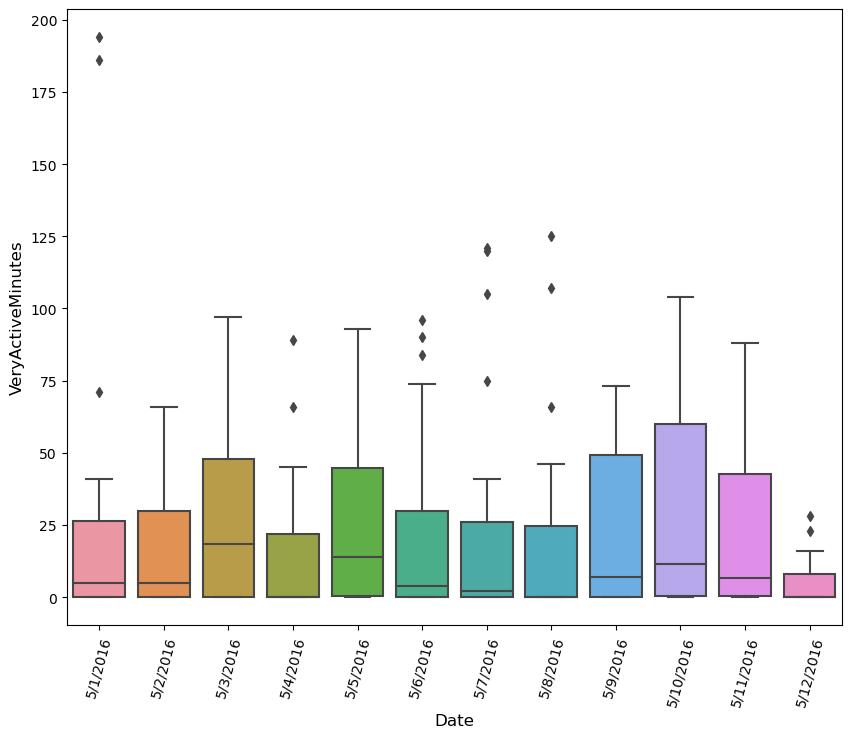

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(Maydf,x='ActivityDate',y='VeryActiveMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("VeryActiveMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [42]:
Maydf[Maydf['ActivityDate']=='5/1/2016'].sum()

ActivityDate            5/1/20165/1/20165/1/20165/1/20165/1/20165/1/20...
TotalSteps                                                         206870
TotalDistance                                                      149.25
VeryActiveDistance                                                  50.26
LightActiveDistance                                                  79.6
VeryActiveMinutes                                                     679
LightlyActiveMinutes                                                 4808
SedentaryMinutes                                                    25725
Calories                                                            62916
dtype: object

In [43]:
Maydf[Maydf['ActivityDate']=='5/3/2016'].sum()

ActivityDate            5/3/20165/3/20165/3/20165/3/20165/3/20165/3/20...
TotalSteps                                                         248203
TotalDistance                                                      176.74
VeryActiveDistance                                                  44.93
LightActiveDistance                                            104.670001
VeryActiveMinutes                                                     723
LightlyActiveMinutes                                                 5897
SedentaryMinutes                                                    27949
Calories                                                            69667
dtype: object

In [44]:
Maydf[Maydf['ActivityDate']=='5/5/2016'].sum()

ActivityDate            5/5/20165/5/20165/5/20165/5/20165/5/20165/5/20...
TotalSteps                                                         253200
TotalDistance                                                  180.280001
VeryActiveDistance                                                  44.68
LightActiveDistance                                                106.55
VeryActiveMinutes                                                     640
LightlyActiveMinutes                                                 6010
SedentaryMinutes                                                    25635
Calories                                                            64445
dtype: object

In [45]:
Maydf[Maydf['ActivityDate']=='5/6/2016'].sum()

ActivityDate            5/6/20165/6/20165/6/20165/6/20165/6/20165/6/20...
TotalSteps                                                         217287
TotalDistance                                                      158.26
VeryActiveDistance                                                  44.69
LightActiveDistance                                                 99.73
VeryActiveMinutes                                                     592
LightlyActiveMinutes                                                 5856
SedentaryMinutes                                                    28183
Calories                                                            67189
dtype: object

In [46]:
Maydf[Maydf['ActivityDate']=='5/7/2016'].sum()

ActivityDate            5/7/20165/7/20165/7/20165/7/20165/7/20165/7/20...
TotalSteps                                                         207386
TotalDistance                                                      148.61
VeryActiveDistance                                                  37.47
LightActiveDistance                                             90.779999
VeryActiveMinutes                                                     598
LightlyActiveMinutes                                                 5256
SedentaryMinutes                                                    23232
Calories                                                            60167
dtype: object

In [47]:
Maydf[Maydf['ActivityDate']=='5/8/2016'].sum()

ActivityDate            5/8/20165/8/20165/8/20165/8/20165/8/20165/8/20...
TotalSteps                                                         190334
TotalDistance                                                  138.779999
VeryActiveDistance                                                  36.71
LightActiveDistance                                             81.520001
VeryActiveMinutes                                                     461
LightlyActiveMinutes                                                 4990
SedentaryMinutes                                                    20108
Calories                                                            55276
dtype: object

In [48]:
Maydf[Maydf['ActivityDate']=='5/9/2016'].sum()

ActivityDate            5/9/20165/9/20165/9/20165/9/20165/9/20165/9/20...
TotalSteps                                                         222718
TotalDistance                                                       161.0
VeryActiveDistance                                              45.810001
LightActiveDistance                                             96.969999
VeryActiveMinutes                                                     617
LightlyActiveMinutes                                                 5432
SedentaryMinutes                                                    22041
Calories                                                            57965
dtype: object

In [49]:
Maydf[Maydf['ActivityDate']=='5/10/2016'].sum()

ActivityDate            5/10/20165/10/20165/10/20165/10/20165/10/20165...
TotalSteps                                                         206737
TotalDistance                                                  147.319998
VeryActiveDistance                                                  37.16
LightActiveDistance                                                 88.39
VeryActiveMinutes                                                     629
LightlyActiveMinutes                                                 4663
SedentaryMinutes                                                    20558
Calories                                                            54496
dtype: object

## Take Away

1. In month May of year 2016 the most active day is 3th.
2. Total very active minutes on that day is 723.

In [50]:
data.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [51]:
GF = data

In [52]:
GF['TotalActiveMinutes']= data['VeryActiveMinutes'] + data['FairlyActiveMinutes'] + data['LightlyActiveMinutes']
GF

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313


In [53]:
datagf = GF[GF['TotalSteps']!= 0]
datagf 

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313


In [54]:
Aprilgf= datagf [datagf ['ActivityDate']<'5/1/2016']
Aprilgf

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,8877689391,4/26/2016,11101,8.430000,8.430000,0.0,1.76,0.13,6.50,0.0,22,3,258,1157,2860,283
924,8877689391,4/27/2016,23629,20.650000,20.650000,0.0,13.07,0.44,7.10,0.0,93,8,235,1104,3808,336
925,8877689391,4/28/2016,14890,11.300000,11.300000,0.0,4.93,0.38,5.97,0.0,58,8,231,1143,3060,297
926,8877689391,4/29/2016,9733,7.390000,7.390000,0.0,1.38,0.17,5.79,0.0,18,5,210,1207,2698,233


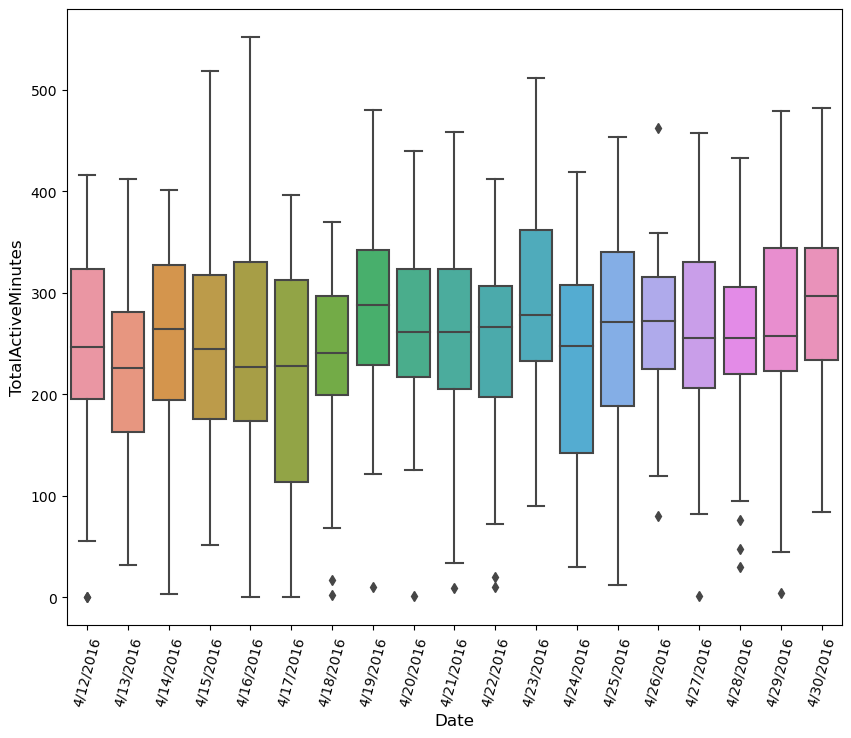

In [55]:
plt.figure(figsize=(10,8))
sns.boxplot(Aprilgf,x='ActivityDate',y='TotalActiveMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("TotalActiveMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [56]:
Aprilgf[Aprilgf['ActivityDate']=='4/15/2016'].sum()

Id                                                               160287631905
ActivityDate                4/15/20164/15/20164/15/20164/15/20164/15/20164...
TotalSteps                                                             248617
TotalDistance                                                           174.5
TrackerDistance                                                         174.5
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                      34.84
ModeratelyActiveDistance                                                13.33
LightActiveDistance                                                    124.32
SedentaryActiveDistance                                                  0.05
VeryActiveMinutes                                                         633
FairlyActiveMinutes                                                       326
LightlyActiveMinutes                                            

In [57]:
Aprilgf[Aprilgf['ActivityDate']=='4/16/2016'].sum()

Id                                                               154302466714
ActivityDate                4/16/20164/16/20164/16/20164/16/20164/16/20164...
TotalSteps                                                             277733
TotalDistance                                                      201.330001
TrackerDistance                                                    201.330001
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                  63.799999
ModeratelyActiveDistance                                                22.68
LightActiveDistance                                                    110.42
SedentaryActiveDistance                                                  0.05
VeryActiveMinutes                                                         891
FairlyActiveMinutes                                                       484
LightlyActiveMinutes                                            

In [58]:
Aprilgf[Aprilgf['ActivityDate']=='4/17/2016'].sum()

Id                                                               138424095123
ActivityDate                4/17/20164/17/20164/17/20164/17/20164/17/20164...
TotalSteps                                                             205096
TotalDistance                                                      145.299999
TrackerDistance                                                    145.299999
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                  36.649999
ModeratelyActiveDistance                                                15.92
LightActiveDistance                                                     90.31
SedentaryActiveDistance                                                  0.02
VeryActiveMinutes                                                         605
FairlyActiveMinutes                                                       379
LightlyActiveMinutes                                            

In [59]:
Aprilgf[Aprilgf['ActivityDate']=='4/23/2016'].sum()

Id                                                               139143362383
ActivityDate                4/23/20164/23/20164/23/20164/23/20164/23/20164...
TotalSteps                                                             267124
TotalDistance                                                      186.920001
TrackerDistance                                                    186.920001
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                  37.059999
ModeratelyActiveDistance                                                19.34
LightActiveDistance                                                130.380001
SedentaryActiveDistance                                                  0.03
VeryActiveMinutes                                                         568
FairlyActiveMinutes                                                       481
LightlyActiveMinutes                                            

In [60]:
Aprilgf[Aprilgf['ActivityDate']=='4/24/2016'].sum()

Id                                                               150365601271
ActivityDate                4/24/20164/24/20164/24/20164/24/20164/24/20164...
TotalSteps                                                             236621
TotalDistance                                                      174.960001
TrackerDistance                                                    174.960001
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                  56.540001
ModeratelyActiveDistance                                                19.77
LightActiveDistance                                                 98.540001
SedentaryActiveDistance                                                  0.02
VeryActiveMinutes                                                         673
FairlyActiveMinutes                                                       439
LightlyActiveMinutes                                            

In [61]:
Aprilgf[Aprilgf['ActivityDate']=='4/25/2016'].sum()

Id                                                               135455925446
ActivityDate                4/25/20164/25/20164/25/20164/25/20164/25/20164...
TotalSteps                                                             253849
TotalDistance                                                      180.250001
TrackerDistance                                                        178.92
LoggedActivitiesDistance                                             9.739114
VeryActiveDistance                                                      57.07
ModeratelyActiveDistance                                                14.41
LightActiveDistance                                                     108.6
SedentaryActiveDistance                                                  0.14
VeryActiveMinutes                                                         909
FairlyActiveMinutes                                                       364
LightlyActiveMinutes                                            

In [62]:
Aprilgf[Aprilgf['ActivityDate']=='4/29/2016'].sum()

Id                                                               137215390104
ActivityDate                4/29/20164/29/20164/29/20164/29/20164/29/20164...
TotalSteps                                                             234289
TotalDistance                                                           165.8
TrackerDistance                                                        164.92
LoggedActivitiesDistance                                             4.911146
VeryActiveDistance                                                      34.35
ModeratelyActiveDistance                                                17.76
LightActiveDistance                                                113.569999
SedentaryActiveDistance                                                  0.01
VeryActiveMinutes                                                         520
FairlyActiveMinutes                                                       448
LightlyActiveMinutes                                            

In [63]:
Aprilgf[Aprilgf['ActivityDate']=='4/30/2016'].sum()

Id                                                               139681723389
ActivityDate                4/30/20164/30/20164/30/20164/30/20164/30/20164...
TotalSteps                                                             258726
TotalDistance                                                      189.119998
TrackerDistance                                                    189.119998
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                      49.48
ModeratelyActiveDistance                                                22.57
LightActiveDistance                                                    116.95
SedentaryActiveDistance                                                  0.04
VeryActiveMinutes                                                         628
FairlyActiveMinutes                                                       513
LightlyActiveMinutes                                            

## Take Away

1. Total active minutes in April 2016 is on 23rd.
2. Total active minutes is  8502.

In [64]:
Maygf= datagf[datagf['ActivityDate']>='5/1/2016']
Maygf

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes
19,1503960366,5/1/2016,10602,6.810000,6.810000,0.0,2.29,1.60,2.92,0.00,33,35,246,730,1820,314
20,1503960366,5/2/2016,14727,9.710000,9.710000,0.0,3.21,0.57,5.92,0.00,41,15,277,798,2004,333
21,1503960366,5/3/2016,15103,9.660000,9.660000,0.0,3.73,1.05,4.88,0.00,50,24,254,816,1990,328
22,1503960366,5/4/2016,11100,7.150000,7.150000,0.0,2.46,0.87,3.82,0.00,36,22,203,1179,1819,261
23,1503960366,5/5/2016,14070,8.900000,8.900000,0.0,2.92,1.08,4.88,0.00,45,24,250,857,1959,319
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313


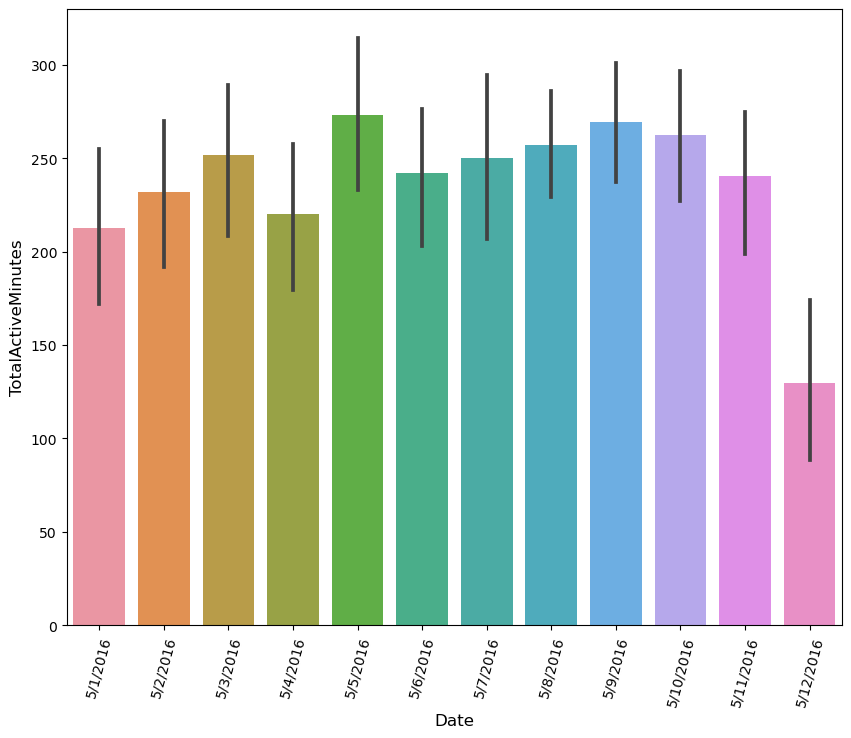

In [65]:
plt.figure(figsize=(10,8))
sns.barplot(Maygf,x='ActivityDate',y='TotalActiveMinutes')
plt.xlabel("Date",fontsize=12)
plt.ylabel("TotalActiveMinutes",fontsize=12)
plt.xticks(rotation = 75)
plt.show()

In [66]:
Maygf[Maygf['ActivityDate']=='5/1/2016'].sum()

Id                                                               136906773984
ActivityDate                5/1/20165/1/20165/1/20165/1/20165/1/20165/1/20...
TotalSteps                                                             206870
TotalDistance                                                          149.25
TrackerDistance                                                        149.25
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                      50.26
ModeratelyActiveDistance                                                18.69
LightActiveDistance                                                      79.6
SedentaryActiveDistance                                                  0.04
VeryActiveMinutes                                                         679
FairlyActiveMinutes                                                       471
LightlyActiveMinutes                                            

In [67]:
Maygf[Maygf['ActivityDate']=='5/2/2016'].sum()

Id                                                               133636766127
ActivityDate                5/2/20165/2/20165/2/20165/2/20165/2/20165/2/20...
TotalSteps                                                             204434
TotalDistance                                                          144.05
TrackerDistance                                                        143.59
LoggedActivitiesDistance                                             4.924473
VeryActiveDistance                                                       28.3
ModeratelyActiveDistance                                                15.79
LightActiveDistance                                                      93.0
SedentaryActiveDistance                                                  0.04
VeryActiveMinutes                                                         466
FairlyActiveMinutes                                                       382
LightlyActiveMinutes                                            

In [68]:
Maygf[Maygf['ActivityDate']=='5/3/2016'].sum()

Id                                                               136139493994
ActivityDate                5/3/20165/3/20165/3/20165/3/20165/3/20165/3/20...
TotalSteps                                                             248203
TotalDistance                                                          176.74
TrackerDistance                                                        175.58
LoggedActivitiesDistance                                             7.165449
VeryActiveDistance                                                      44.93
ModeratelyActiveDistance                                                17.55
LightActiveDistance                                                104.670001
SedentaryActiveDistance                                                  0.09
VeryActiveMinutes                                                         723
FairlyActiveMinutes                                                       430
LightlyActiveMinutes                                            

In [69]:
Maygf[Maygf['ActivityDate']=='5/4/2016'].sum()

Id                                                               128473527028
ActivityDate                5/4/20165/4/20165/4/20165/4/20165/4/20165/4/20...
TotalSteps                                                             196149
TotalDistance                                                      143.269999
TrackerDistance                                                    143.269999
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                      39.28
ModeratelyActiveDistance                                                12.91
LightActiveDistance                                                     87.94
SedentaryActiveDistance                                                  0.03
VeryActiveMinutes                                                         405
FairlyActiveMinutes                                                       323
LightlyActiveMinutes                                            

In [70]:
Maygf[Maygf['ActivityDate']=='5/5/2016'].sum()

Id                                                               124761289255
ActivityDate                5/5/20165/5/20165/5/20165/5/20165/5/20165/5/20...
TotalSteps                                                             253200
TotalDistance                                                      180.280001
TrackerDistance                                                        179.22
LoggedActivitiesDistance                                             7.131313
VeryActiveDistance                                                      44.68
ModeratelyActiveDistance                                                20.34
LightActiveDistance                                                    106.55
SedentaryActiveDistance                                                   0.1
VeryActiveMinutes                                                         640
FairlyActiveMinutes                                                       448
LightlyActiveMinutes                                            

In [71]:
Maygf[Maygf['ActivityDate']=='5/6/2016'].sum()

Id                                                               133465150489
ActivityDate                5/6/20165/6/20165/6/20165/6/20165/6/20165/6/20...
TotalSteps                                                             217287
TotalDistance                                                          158.26
TrackerDistance                                                        158.26
LoggedActivitiesDistance                                             2.092147
VeryActiveDistance                                                      44.69
ModeratelyActiveDistance                                                13.49
LightActiveDistance                                                     99.73
SedentaryActiveDistance                                                  0.08
VeryActiveMinutes                                                         592
FairlyActiveMinutes                                                       328
LightlyActiveMinutes                                            

In [72]:
Maygf[Maygf['ActivityDate']=='5/7/2016'].sum()

Id                                                               119035750933
ActivityDate                5/7/20165/7/20165/7/20165/7/20165/7/20165/7/20...
TotalSteps                                                             207386
TotalDistance                                                          148.61
TrackerDistance                                                        148.61
LoggedActivitiesDistance                                                  0.0
VeryActiveDistance                                                      37.47
ModeratelyActiveDistance                                                 19.4
LightActiveDistance                                                 90.779999
SedentaryActiveDistance                                                  0.01
VeryActiveMinutes                                                         598
FairlyActiveMinutes                                                       407
LightlyActiveMinutes                                            

In [73]:
Maygf[Maygf['ActivityDate']=='5/11/2016'].sum()

Id                                                               103500518847
ActivityDate                5/11/20165/11/20165/11/20165/11/20165/11/20165...
TotalSteps                                                             180468
TotalDistance                                                      131.869999
TrackerDistance                                                    131.869999
LoggedActivitiesDistance                                             2.092147
VeryActiveDistance                                                      38.51
ModeratelyActiveDistance                                                15.36
LightActiveDistance                                                     77.81
SedentaryActiveDistance                                                  0.02
VeryActiveMinutes                                                         510
FairlyActiveMinutes                                                       348
LightlyActiveMinutes                                            

## Take Away

1. Total active minutes in May 2016 is on 5th.
2. Total active minutes is 7098.


### Note : For finding which day is inactive and active, we have to convert the dates to days.

In [74]:
data['datetime'] = pd.to_datetime(df['ActivityDate'])
data['datetime']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: datetime, Length: 940, dtype: datetime64[ns]

In [75]:
data['day'] = data['datetime'].dt.day_name()
data['day'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: day, dtype: object

In [76]:
data

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,datetime,day
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985,366,2016-04-12,Tuesday
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797,257,2016-04-13,Wednesday
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776,222,2016-04-14,Thursday
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745,272,2016-04-15,Friday
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863,267,2016-04-16,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847,266,2016-05-08,Sunday
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710,309,2016-05-09,Monday
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832,253,2016-05-10,Tuesday
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832,313,2016-05-11,Wednesday


In [77]:
day = data['day'].value_counts()
days =day.index

In [78]:
Inactive_chart = data.loc[:,['day','SedentaryMinutes']]
y = Inactive_chart.value_counts()
y

day        SedentaryMinutes
Tuesday    1440                16
Thursday   1440                12
Wednesday  1440                12
Sunday     1440                12
Monday     1440                11
                               ..
Saturday   1344                 1
           1350                 1
           1377                 1
           1392                 1
Friday     2                    1
Length: 801, dtype: int64

In [79]:
import plotly.graph_objects as go

In [80]:
labels = day.index
labels

Index(['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday',
       'Monday'],
      dtype='object')

In [81]:
values = data['SedentaryMinutes']
values

0       728
1       776
2      1218
3       726
4       773
       ... 
935    1174
936    1131
937    1187
938    1127
939     770
Name: SedentaryMinutes, Length: 940, dtype: int64

In [85]:
fig1 = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0, 0, 0.2, 0])])
fig1.update_layout(title_text='Inactive Minutes')
fig1.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30)
fig1.show()

### Thursday is most inactive day which is 20.6% and least inactive day is Sunday (9.12%)

In [83]:
active = data['Calories']
active

0      1985
1      1797
2      1776
3      1745
4      1863
       ... 
935    2847
936    3710
937    2832
938    3832
939    1849
Name: Calories, Length: 940, dtype: int64

In [84]:
fig2 = go.Figure(data=[go.Pie(labels=labels, values=active, pull=[0, 0, 0, 0])])
fig2.update_layout(title_text=' Calories Burned')
fig2.update_traces(hoverinfo='label+percent',textinfo='value',textfont_size=30)
fig2.show()

### Most calories burned is on Tuesday 15.5% ,so most active day is Tuesday and least active day is Sunday 13.5%

## Conclusion

1. In year 2016 most inactive day is on 18th of April with sedentary minutes 32519 & most active day is 3rd of May with   723 minutes. The total active minutes recorded on 23rd of April with 8502 minutes.
2. When coming to the days Tuesday is most active day and Thursday is most inactive day in the data set.

